<div style="float:left;">
<table>
  <tr>
      <th>Asignatura: </th>
    <td style="text-align: left;">Tecnología y Protocolos de comunicación</td>
      <td rowspan=4><img src=https://www.zonauex.es/ficheros/imagenes/2014_10/galleta.png width=70></td>
  </tr>
  <tr>
     <th>Máster: </th>
    <td style="text-align: left;">Máster en Ingeniería Informática</td>
  </tr>
  <tr>
      <th rowspan=2>Centro: </th>
    <td style="text-align: left;">Escuela Politécnica (Cáceres)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Universidad de Extremadura</td>
  </tr>
</table>
</div>
<div style="float:left;">

<table style="width: 100%; text-align: center">
    <tr>
        <th>Autores: </th>
        <td style="text-align: center;">Gonzalo Jiménez Hinchado</td>
        <td style="text-align:  center;"> - </td>
        <td style="text-align:  center;">José Ramón Lozano Pinilla</td>
        <td style="text-align:  center;"> - </td>
        <td style="text-align:  center;">Sergio Fernández Rincón</td>
    </tr>
</table>
</div>
      
<hr>
<h1 style="margin-left: 60%;">Escenario mediano</h1>

<hr>



# Descripción del escenario

Este escenario está compuesto de los dispositivos necesarios para el correcto funcionamiento del sistema al completo. Así, este escenario dispone de **cuatro dispositivos** interconectados entre sí a través de **un switch** y, este último, se conecta a un **switch central** que es el encargado de realizar las peticiones al **servidor** en donde está ubicada la **API** de *Family Lock*.

La *figura 1* muestra la representación gráfica del escenario expuesto. 

<img src='resources/Medium-stage.png' width=600 alt="Imagen del escenario mediano" title="Imagen del escenario mediano">
<p style="text-align: center;"><i>Figura 1. Mapa de red del escenario mediano</i></p>

# Pruebas

## El comando Iperf

La prueba que se ha realizado consiste en crear un flujo de tráfico mediante el comando `iperf`. *Iperf* es una herramienta que sirve para medir el ancho de banda (*bandwidth*) y la calidad de un enlace de red.

La calidad del enlace responde a las siguientes métricas:

- **Latencia (latency)**: es el tiempo de respuesta o RTT. También puede obtenerse mediante el comando `ping`.
- **Jitter** (variación en la latencia). Puede medirse con `iperf` ejecutando una prueba con el **protocolo UDP**.
- **Perdida de datagramas** (Lost): Puede medirse con `iperf` ejecutando una prueba con el **protocolo UDP**.
- **Ancho de banda**: se mide mediante pruebas con el **protocolo TCP**.

Iperf utiliza una gran cantidad de argumentos, pero los más relevantes para nosotros son los siguientes:

- **-t**: tiempo en segundo en los que se realizará la transferencia de información. En nuestro caso se ha definido en 10s, el valor por defecto.
- **-i**: intervalo de tiempo entre los diferentes reportes de ancho de banda, jitter y pérdida de paquetes. En nuestro caso se ha definido un intervalo de 1s por reporte.
- **-b**: ancho de banda (bandwidth) del destino en bits por segundo. En nuestro caso se ha definido que los anchos de banda con los que se van a realizar las pruebas son de 10, 100 y 1000 Mbits/sec.
- **-u**: se utiliza UDP en lugar de TCP.
- **-s**: el proceso que utilice este parámetro actuará como servidor.
- **-c**: el proceso que utilice este parámetro actuará como cliente.
- **-y**: los reportes se devuelven separados por coma, en nuestro caso es necesario debido a que almacenamos todos los reportes en un fichero .csv, para su posterior procesamiento y estudio.
- **-C**: modo de compatibilidad con versiones anteriores de iperf. 


## Pruebas realizadas

### Clientes

Para cada host se ha realizado una ejecución del comando `iperf` en modo cliente `-c` hacia la dirección ip del servidor, haciendo uso del protocolo UDP `-u` con un tiempo máximo de transferencia de 100 segundos `-t 10` y con un intervalo de tiempo de 1 segundo entre diferentes reportes `-i 1`.

Así pues, el comando `iperf` resultante quedaría de la siguiente manera:

```iperf -c <ip-server> -u -t 10 -i1 -y -C```

En donde `-y` indica que los datos estarán separados por el caracter `,` y `-C` indica que el comando está en modo de compatibilidad con otras versiones.

### Servidor

Para cada servidor, se ha realizado una ejecución del comando `iperf` en modo servidor `-s` haciendo uso del protocolo UDP `-u`.

Así, el comando resultante es:

```iperf -s -u -y -C```

**Nota:** el resultado de la ejecución de estos comandos se vuelcan a una serie de informes en formato CSV.


## Análisis de resultados

En primer lugar vamos a realizar un análisis sobre tres tests diferentes para, así, poder comprobar las diferencias a grandes rasgos entre ellos.

Después, realizaremos lo mismo para los servidores y así poder compararlos.

### Pruebas de los clientes

Lo que haremos será cargar los datos de los clientes en Dataframes para poder tratar los datos y realizar un análisis mediante gráficas.

Las librerías que vamos a necesitar son:

- **Pandas**: para lectura y tratamiento de datos.
- **Numpy**: para generar arrays de datos
- **Matplotlib**: para visualización de datos.
- **Display**: para mostrar datos en formato tabla.


In [88]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from IPython.display import display, HTML
import matplotlib.pyplot as plt

Las siguientes líneas muestran las diferentes rutas que toman los ficheros del cliente.

In [89]:
# ubicación de los tests del escenario mediano

path = "stage-medium/"
client_path_test_1 = path + "iperfClientTest1.csv"
client_path_test_2 = path + "iperfClientTest2.csv"
client_path_test_3 = path + "iperfClientTest3.csv"

El siguiente paso es almacenar los datos del csv en una lista. Para ello, usamos la función `read_csv` que nos ofrece la librería pandas. Los parámetros que usamos en la llamada son:

- **encoding**: indica la codificación de caracteres del documento. En nuestro caso, `ISO-8859-1`
- **delimiter**: indica el delimitador de las columnas de datos, en nuestro caso, será una coma.
- **error_bad_libes**: con el valor a False obviamos los posibles errores en líneas que tengan datos diferentes a los que esperamos. Como las respuestas que nos da el servidor tienen más campos que las de los hosts deberemos añadir este parámetro.

In [90]:
data_client_test1 = pd.read_csv(client_path_test_1, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_client_test2 = pd.read_csv(client_path_test_2, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_client_test3 = pd.read_csv(client_path_test_3, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)

# mostramos la cabecera del fichero
data_client_test1.head()

b'Skipping line 14: expected 9 fields, saw 14\nSkipping line 26: expected 9 fields, saw 14\nSkipping line 38: expected 9 fields, saw 14\nSkipping line 50: expected 9 fields, saw 14\nSkipping line 62: expected 9 fields, saw 14\nSkipping line 74: expected 9 fields, saw 14\nSkipping line 86: expected 9 fields, saw 14\nSkipping line 98: expected 9 fields, saw 14\nSkipping line 110: expected 9 fields, saw 14\nSkipping line 122: expected 9 fields, saw 14\nSkipping line 134: expected 9 fields, saw 14\nSkipping line 146: expected 9 fields, saw 14\nSkipping line 158: expected 9 fields, saw 14\nSkipping line 170: expected 9 fields, saw 14\nSkipping line 182: expected 9 fields, saw 14\nSkipping line 194: expected 9 fields, saw 14\nSkipping line 206: expected 9 fields, saw 14\nSkipping line 218: expected 9 fields, saw 14\nSkipping line 230: expected 9 fields, saw 14\nSkipping line 242: expected 9 fields, saw 14\nSkipping line 254: expected 9 fields, saw 14\nSkipping line 266: expected 9 fields, sa

,20201212165120,10.0.0.2,51671,10.0.0.1,5001,3,0.0-1.0,133770,1070160
0,20201212165121,10.0.0.2,51671,10.0.0.1,5001,3,1.0-2.0,130830,1046640
1,20201212165122,10.0.0.2,51671,10.0.0.1,5001,3,2.0-3.0,130830,1046640
2,20201212165123,10.0.0.2,51671,10.0.0.1,5001,3,3.0-4.0,130830,1046640
3,20201212165124,10.0.0.2,51671,10.0.0.1,5001,3,4.0-5.0,130830,1046640
4,20201212165125,10.0.0.2,51671,10.0.0.1,5001,3,5.0-6.0,130830,1046640


Como los datos obtenidos no tienen header, añadimos los valores de los campos correspondientes a lo que devuelve el comando `iperf`.
 

In [91]:
test_columns = ["Timestamp", "Local", "Port", "connected to", 
                "Port", "ID","Intervalo","Transfer (bytes)", "Bandwidth (bits/s)"]
# insertamos los headers 
data_client_test1.columns=test_columns
data_client_test2.columns=test_columns
data_client_test3.columns=test_columns

# Mostramos la tabla del dataset en formato html...
display(HTML(data_client_test1.to_html()))

,Timestamp,Local,Port,connected to,Port,ID,Intervalo,Transfer (bytes),Bandwidth (bits/s)
0,20201212165121,10.0.0.2,51671,10.0.0.1,5001,3,1.0-2.0,130830,1046640
1,20201212165122,10.0.0.2,51671,10.0.0.1,5001,3,2.0-3.0,130830,1046640
2,20201212165123,10.0.0.2,51671,10.0.0.1,5001,3,3.0-4.0,130830,1046640
3,20201212165124,10.0.0.2,51671,10.0.0.1,5001,3,4.0-5.0,130830,1046640
4,20201212165125,10.0.0.2,51671,10.0.0.1,5001,3,5.0-6.0,130830,1046640
5,20201212165126,10.0.0.2,51671,10.0.0.1,5001,3,6.0-7.0,132300,1058400
6,20201212165127,10.0.0.2,51671,10.0.0.1,5001,3,7.0-8.0,130830,1046640
7,20201212165128,10.0.0.2,51671,10.0.0.1,5001,3,8.0-9.0,130830,1046640
8,20201212165128,10.0.0.3,35298,10.0.0.1,5001,3,0.0-1.0,133770,1070160
9,20201212165129,10.0.0.2,51671,10.0.0.1,5001,3,9.0-10.0,130830,1046640


## Limpieza de datos

Como se puede observar en la tabla anterior, los datos que nos interesan obtener son el Host origen (columna local), el intervalo, la transferencia y el ancho de banda. El resto de datos no son relevantes ya que al tener un único servidor, los datos siempre serán enviados al mismo con el mismo puerto.

En las siguientes líneas eliminamos las columnas que no son necesarias:

- timestamp
- port
- connected to
- ID

Y convertimos los Dataframes obtenidos en los pasos anteriores en listas de cadenas de caracteres.

In [92]:
def clean_data(dataset, data_to_clean):
    return dataset.drop(data_to_clean,axis=1)


client_columns_to_remove = ["Timestamp", "Port", "connected to","Port","ID"]
# eliminamos las columnas que no nos interesan de los tres conjuntos de datos
clean_data_client1 = clean_data(data_client_test1, client_columns_to_remove)
clean_data_client2 = clean_data(data_client_test2, client_columns_to_remove)
clean_data_client3 = clean_data(data_client_test3, client_columns_to_remove)

#obtenemos los valores de cada uno

#test 1
data_values_client1 = clean_data_client1.values
hosts_1 = data_values_client1[:, 0]
hosts_1 = list(hosts_1.astype('str'))

intervals_test1 = data_values_client1[:, 1]
intervals_test1 = list(intervals_test1.astype('str'))

transfer_test1 = data_values_client1[:, 2]
transfer_test1 = list(transfer_test1.astype('str'))

bandwidth_test1 = data_values_client1[:, 3]
bandwidth_test1 = list(bandwidth_test1.astype('str'))

y_axis_test1 = data_values_client1[:,0:4]
y_axis_test1 = y_axis_test1.astype('str')

print("CONJUNTOS DE DATOS DEL TEST 1")
print("Valores de los hosts ", hosts_1)
print("\nIntervalos:  ", intervals_test1)
print("\nTransferencia: ", transfer_test1)
print("\nAncho de banda: ", bandwidth_test1)
print("-------------------------------------------------------\n")

# test 2

data_values_cient2 = clean_data_client2.values
hosts_2 = data_values_cient2[:, 0]
hosts_2 = list(hosts_2.astype('str'))

intervals_test2 = data_values_cient2[:, 1]
intervals_test2 = list(intervals_test2.astype('str'))

transfer_test2 = data_values_cient2[:, 2]
transfer_test2 = list(transfer_test2.astype('str'))

bandwidth_test2 = data_values_cient2[:, 3]
bandwidth_test2 = list(bandwidth_test2.astype('str'))

y_axis_test2 = data_values_cient2[:,0:4]
y_axis_test2 = y_axis_test2.astype('str')

print("CONJUNTOS DE DATOS DEL TEST 2")
print("TUti values", y_axis_test2)
print("Valores de los hosts ", hosts_2)
print("\nIntervalos:  ", intervals_test2)
print("\nTransferencia: ", transfer_test2)
print("\nAncho de banda: ", bandwidth_test2)
print("-------------------------------------------------------\n")

# x_axis = np.unique(x_axis)



# test 3

data_values_cient3 = clean_data_client3.values
hosts_3 = data_values_cient3[:, 0]
hosts_3 = list(hosts_3.astype('str'))

intervals_test3 = data_values_cient3[:, 1]
intervals_test3 = list(intervals_test3.astype('str'))

transfer_test3 = data_values_cient3[:, 2]
transfer_test3 = list(transfer_test3.astype('str'))

bandwidth_test3 = data_values_cient3[:, 3]
bandwidth_test3 = list(bandwidth_test3.astype('str'))

y_axis_test3 = data_values_cient3[:,0:4]
y_axis_test3 = y_axis_test3.astype('str')

print("CONJUNTOS DE DATOS DEL TEST 3")
print("Valores de los hosts ", y_axis_test2)
print("\nIntervalos:  ", intervals_test3)
print("\nTransferencia: ", transfer_test3)
print("\nAncho de banda: ", bandwidth_test3)
print("-------------------------------------------------------\n")



CONJUNTOS DE DATOS DEL TEST 1
Valores de los hosts  ['10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.2', '10.0.0.3', '10.0.0.2', '10.0.0.3', '10.0.0.2', '10.0.0.3', '10.0.0.3', '10.0.0.3', '10.0.0.3', '10.0.0.3', '10.0.0.3', '10.0.0.3', '10.0.0.4', '10.0.0.3', '10.0.0.4', '10.0.0.3', '10.0.0.4', '10.0.0.4', '10.0.0.4', '10.0.0.4', '10.0.0.4', '10.0.0.4', '10.0.0.4', '10.0.0.5', '10.0.0.4', '10.0.0.4', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.5', '10.0.0.6', '10.0.0.5', '10.0.0.6', '10.0.0.5', '10.0.0.6', '10.0.0.6', '10.0.0.6', '10.0.0.6', '10.0.0.6', '10.0.0.6', '10.0.0.6', '10.0.0.7', '10.0.0.6', '10.0.0.7', '10.0.0.6', '10.0.0.7', '10.0.0.7', '10.0.0.7', '10.0.0.7', '10.0.0.7', '10.0.0.7', '10.0.0.7', '10.0.0.8', '10.0.0.7', '10.0.0.7', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.8', '10.0.0.9', '10.0.0.8', '10.0.0.9', '10.0.0.8', '10.0.0.9',

## Análisis de datos

Una vez hemos realizado todo el preprocesado de datos, vamos a generar diferentes gráficas para analizar los resultados obtenidos por el comando `iperf`.

Así pues, las siguientes gráficas muestran la tasa de transferencia por intervalo de cada test realizado.

**Test 1**

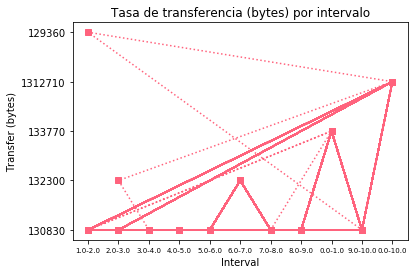

In [93]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(intervals_test1, transfer_test1, 's',
        color="#FF637D", linestyle=":")
plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

Es evidente apreciar que cuanto mayor sea el intervalo, mayor transferencia de datos hay. Esto mismo ocurre con los demás Tests realizados.

**Test 2**

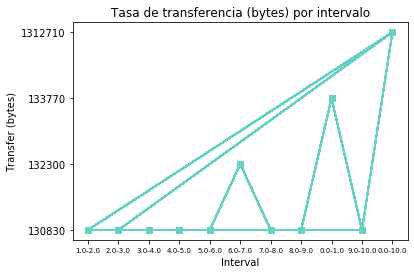

In [94]:
plt.plot(intervals_test2, transfer_test2, 's',
        color="#68D1C5")

plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

**Test 3**

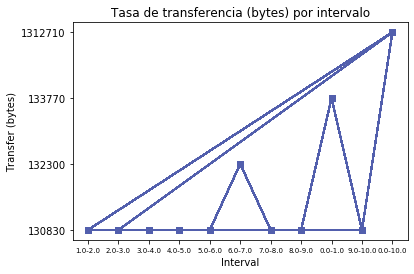

In [95]:
plt.plot(intervals_test3, transfer_test3, 's',
        color="#525fad")

plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

**Conclusiones**

Los resultados obtenidos para los tres tests son exactamente idénticos.

**Análisis de ancho de banda por intervalo**

La siguiente gráfica muestra la comparativa entre el ancho de banda por intervalo en los tres tests.

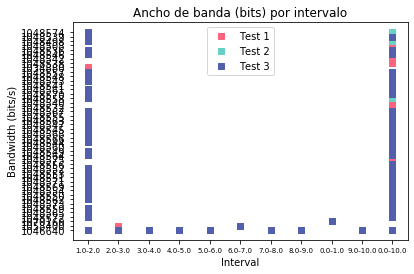

In [96]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(intervals_test1, bandwidth_test1, 's',
        color="#FF637D",  label="Test 1")
plt.plot(intervals_test2, bandwidth_test2, 's',
        color="#68D1C5",  label="Test 2")
plt.plot(intervals_test3, bandwidth_test2, 's',
        color="#525fad", label="Test 3")

plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.legend()
plt.show()


Como se puede observar, en lel último intervalo aglutina los mayores anchos de banda de la red para los tres tests, siendo el segundo test el que mayor ancho de banda alcanza: 1048559 bits por segundo.

Las siguientes gráficas son la representación de esta misma comparativa llevada a nivel individual.

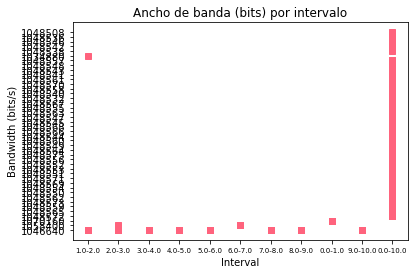

In [97]:
plt.plot(intervals_test1, bandwidth_test1, 's',
        color="#FF637D")
plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()

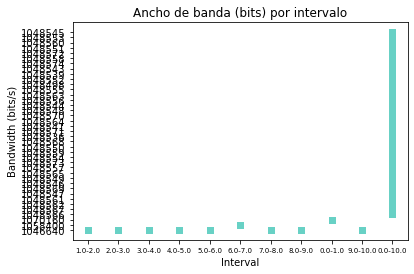

In [98]:
plt.plot(intervals_test2, bandwidth_test2, 's',
        color="#68D1C5")
plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()

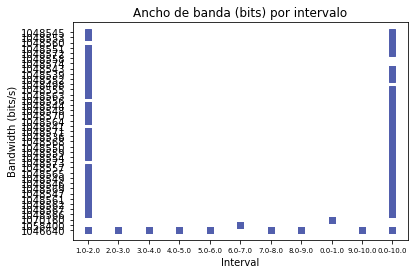

In [99]:
plt.plot(intervals_test3, bandwidth_test2, 
         's', color="#525fad", )

plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()

**Conclusiones**

El intervalo 0.0-10.0 obtiene las mayores tasas de transferencias de datos debido a que el intevalo no está acotado en un punto como en el resto de valores, sino que el rango es de 10 puntos.

**Análisis de Transferencias de datos por ancho de banda**

Las siguientes gráficas muestran una comparativa entre la transferencia de datos y el ancho de banda del canal. Es lógico predecir que será una comparativa directamente proporcional ya que a mayor ancho de banda, mayor será la cantidad de datos que podremos enviar por la red.

Así pues, la gráfica para el test 1 es:

**Test 1**

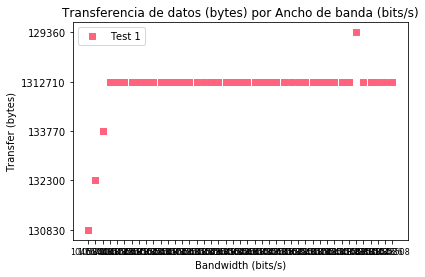

In [100]:
params = {'xtick.labelsize': 8, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(bandwidth_test1,transfer_test1, 's',
         color="#FF637D", label="Test 1")
plt.title("Transferencia de datos (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.legend()
plt.show()


**Test 2**

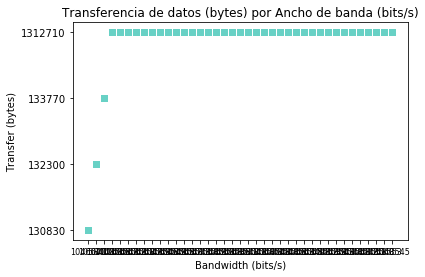

In [101]:
plt.plot(bandwidth_test2, transfer_test2, 
         's', color="#68D1C5")
plt.title("Transferencia de datos (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.show()

**Test 3**

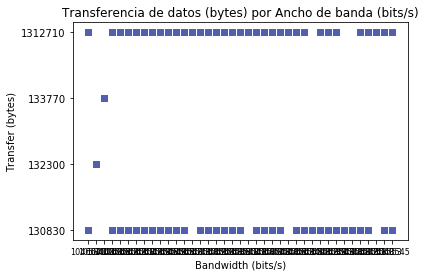

In [102]:
plt.plot(bandwidth_test2,transfer_test3, 
         's', color="#525fad")
plt.title("Transferencia de datos (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.show()

**Conclusiones**
Como se mencionó al principio, esta comparativa es directamente proporcional ya que a mayor ancho de banda (número de bits por segundo que admite la red) mayor será la cantidad de datos que podremos enviar por el canal.

**Análisis de ancho de banda por host**

Como el único valor que varía realmente es el ancho de banda, vamos a realizar un análisis comparativo entre todos los hosts de los tres tests realizados para ver cuál es la diferencia entre los ellos.

Así pues, la gráfica general con el máximo ancho de banda alcanzado por host y test es:

In [103]:
def get_list(list_in):
    hosts = []
    intervals = []
    bw = []
    trans = []
    for x in list_in:
        hosts.append(list(x.astype('str'))[0])
        intervals.append(list(x.astype('str'))[1])
        trans.append(list(x.astype('str'))[2])
        bw.append(list(x.astype('str'))[3])
    values = []
    for h, i, t, b in zip(hosts, intervals, trans, bw):
        values.append([h, i, int(t), int(b)])
    return values

In [104]:
def get_max_values(values_in, _type):
    max_value_by_host = [[values_in[0][0], values_in[0][_type]]]

    for value in values_in:
        if value[0] not in [x[0] for x in filter(lambda x: x[0], max_value_by_host)]:
            max_value_by_host.append([value[0], value[_type]])
        else:
            for x in filter(lambda x: x[0] == value[0], max_value_by_host):
                if value[_type] > x[1]:
                    print(value[0], ' - ', x[0] ,':', value[_type], "is replacing ", x[1])
                    x[1] = value[_type]
            
                
                
    return sorted(max_value_by_host)

10.0.0.2  -  10.0.0.2 : 1058400 is replacing  1046640
10.0.0.2  -  10.0.0.2 : 1058400 is replacing  1046640
10.0.0.2  -  10.0.0.2 : 1058400 is replacing  1046640
[['10.0.0.10', 1070160], ['10.0.0.100', 1070160], ['10.0.0.101', 1070160], ['10.0.0.102', 1070160], ['10.0.0.103', 1070160], ['10.0.0.104', 1070160], ['10.0.0.105', 1070160], ['10.0.0.106', 1070160], ['10.0.0.107', 1070160], ['10.0.0.108', 1070160], ['10.0.0.109', 1070160], ['10.0.0.11', 1070160], ['10.0.0.110', 1070160], ['10.0.0.111', 1070160], ['10.0.0.112', 1070160], ['10.0.0.113', 1070160], ['10.0.0.114', 1070160], ['10.0.0.115', 1070160], ['10.0.0.116', 1070160], ['10.0.0.117', 1070160], ['10.0.0.118', 1070160], ['10.0.0.119', 1070160], ['10.0.0.12', 1070160], ['10.0.0.120', 1070160], ['10.0.0.121', 1070160], ['10.0.0.122', 1070160], ['10.0.0.123', 1070160], ['10.0.0.124', 1070160], ['10.0.0.125', 1070160], ['10.0.0.126', 1070160], ['10.0.0.127', 1070160], ['10.0.0.128', 1070160], ['10.0.0.129', 1070160], ['10.0.0.13', 1

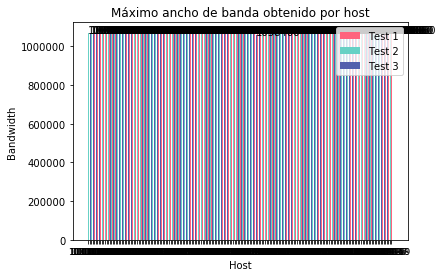

In [105]:
values_test1 = get_list(y_axis_test1)
values_test2 = get_list(y_axis_test2)
values_test3 = get_list(y_axis_test3)

max_values1= get_max_values(values_test1, 3)
max_values2= get_max_values(values_test2, 3)
max_values3= get_max_values(values_test3, 3)
print(max_values2)
print(max_values3)

width=0.25
X = np.arange(len(max_values1)) 

plt.bar(X+0.0, [x[1] for x in filter(lambda x: x[1], max_values1)], width, 
                  label="Test 1", color="#FF637D")
plt.bar(X+0.25, [x[1] for x in filter(lambda x: x[1], max_values2)], width, 
                  label="Test 2", color="#68D1C5")

plt.bar(X+0.25*2, [x[1] for x in filter(lambda x: x[1], max_values3)], width, 
                  label="Test 3", color="#525fad")

x_indice = np.arange(len([x[0] for x in filter(lambda x: x[0], max_values1)]))

plt.xticks(x_indice, [x[0] for x in filter(lambda x: x[0], max_values1)])

for i, v in enumerate([x[1] for x in filter(lambda x: x[1], max_values1)]):
       plt.text(i, v + 3, str(v))
    
plt.title("Máximo ancho de banda obtenido por host")
plt.xlabel("Host")
plt.ylabel("Bandwidth")
plt.legend()

plt.show()


Como podemos apreciar, en todos los tests se alcanca un ancho de banda de 1,02 MBytes/s . No obstante, no en todos los tests obtenemos los mismos valores de ancho de banda para los hosts, todo lo contrario. Veamos:

**Test 3**
Para el test 1, se obtienen los valores de bits/s mostrados en la siguiente tabla.

In [106]:
bandwidth_test1_np = np.unique(bandwidth_test1)

df = pd.DataFrame({"Test 1 (bits/s)":bandwidth_test1_np})
 
display(HTML(df.to_html()))


,Test 1 (bits/s)
0,1034880
1,1046640
2,1048508
3,1048532
4,1048536
5,1048538
6,1048540
7,1048541
8,1048542
9,1048543


**Test 2**
Para el segundo, tenemos:

In [107]:
bandwidth_test2_np = np.unique(bandwidth_test2)

df = pd.DataFrame({"Test 2 (bits/s)":bandwidth_test2_np})
 
display(HTML(df.to_html()))

,Test 2 (bits/s)
0,1046640
1,1048498
2,1048536
3,1048539
4,1048541
5,1048543
6,1048544
7,1048545
8,1048546
9,1048547


**Test 3**
Y para el tercero:

In [108]:
bandwidth_test2_np = np.unique(bandwidth_test2)
df = pd.DataFrame({"Test 2":bandwidth_test2_np})
 
display(HTML(df.to_html()))

,Test 2
0,1046640
1,1048498
2,1048536
3,1048539
4,1048541
5,1048543
6,1048544
7,1048545
8,1048546
9,1048547


**Conclusiones**

Quetodos los tests hayan alcanzado el mismo ancho de banda en todos los hosts, nos indica que el canal de comunicación, debido al valor de la tasa de transferencias, es bastante bueno.

### Servidor
Para el servidor hemos definido una serie de pruebas que evalúan únicamente la calidad de la red haciendo uso de los parámetros jitter y ancho de banda.

In [109]:
path_test_server1 = path + "iperfServerTest1.csv"
path_test_server2 = path + "iperfServerTest2.csv"
path_test_server3 = path + "iperfServerTest3.csv"

In [110]:
data_server_test1 = pd.read_csv(path_test_server1, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_server_test2 = pd.read_csv(path_test_server2, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_server_test3 = pd.read_csv(path_test_server3, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)

# mostramos la cabecera del fichero
data_server_test1.head()

,20201212165129,10.0.0.1,5001,10.0.0.2,51671,3,0.0-6.9,909930,1052337,0.006,274,893,30.683,0
0,20201212165137,10.0.0.1,5001,10.0.0.3,35298,4,0.0-10.0,1312710,1050630,0.014,0,893,0.0,0
1,20201212165145,10.0.0.1,5001,10.0.0.4,46883,5,0.0-10.0,1312710,1050515,0.005,0,893,0.0,1
2,20201212165153,10.0.0.1,5001,10.0.0.5,43944,3,0.0-10.0,1312710,1050828,0.008,0,893,0.0,1
3,20201212165201,10.0.0.1,5001,10.0.0.6,49394,4,0.0-10.0,1312710,1050363,0.006,0,893,0.0,0
4,20201212165209,10.0.0.1,5001,10.0.0.7,33731,5,0.0-10.0,1312710,1050169,0.006,0,893,0.0,0


In [111]:
test_columns = ["Timestamp", "Local", "Port", 
                "connected to", "Port", "ID",
                "Intervalo","Transfer (bytes)", 
                "Bandwidth (bits/s)","Jitter", 
                "Lost", "Total", "Datagrams", "Value"]
# insertamos los headers 
data_server_test1.columns=test_columns
data_server_test2.columns=test_columns
data_server_test3.columns=test_columns

# Mostramos la tabla del dataset en formato html...
display(HTML(data_server_test1.to_html()))

,Timestamp,Local,Port,connected to,Port,ID,Intervalo,Transfer (bytes),Bandwidth (bits/s),Jitter,Lost,Total,Datagrams,Value
0,20201212165137,10.0.0.1,5001,10.0.0.3,35298,4,0.0-10.0,1312710,1050630,0.014,0,893,0.0,0
1,20201212165145,10.0.0.1,5001,10.0.0.4,46883,5,0.0-10.0,1312710,1050515,0.005,0,893,0.0,1
2,20201212165153,10.0.0.1,5001,10.0.0.5,43944,3,0.0-10.0,1312710,1050828,0.008,0,893,0.0,1
3,20201212165201,10.0.0.1,5001,10.0.0.6,49394,4,0.0-10.0,1312710,1050363,0.006,0,893,0.0,0
4,20201212165209,10.0.0.1,5001,10.0.0.7,33731,5,0.0-10.0,1312710,1050169,0.006,0,893,0.0,0
5,20201212165217,10.0.0.1,5001,10.0.0.8,45572,3,0.0-10.0,1312710,1050499,0.005,0,893,0.0,0
6,20201212165225,10.0.0.1,5001,10.0.0.9,57346,4,0.0-10.0,1312710,1050532,0.002,0,893,0.0,0
7,20201212165233,10.0.0.1,5001,10.0.0.10,49532,5,0.0-10.0,1312710,1050494,0.006,0,893,0.0,1
8,20201212165241,10.0.0.1,5001,10.0.0.11,40610,3,0.0-10.0,1312710,1050648,0.007,0,893,0.0,0
9,20201212165249,10.0.0.1,5001,10.0.0.12,35223,4,0.0-10.0,1312710,1050284,0.005,0,893,0.0,0


In [112]:
display(HTML(data_server_test2.to_html()))

,Timestamp,Local,Port,connected to,Port,ID,Intervalo,Transfer (bytes),Bandwidth (bits/s),Jitter,Lost,Total,Datagrams,Value
0,20201212171819,10.0.0.1,5001,10.0.0.3,37001,4,0.0-10.0,1312710,1049044,0.005,0,893,0.0,0
1,20201212171827,10.0.0.1,5001,10.0.0.4,40266,5,0.0-10.0,1312710,1048993,0.007,0,893,0.0,0
2,20201212171835,10.0.0.1,5001,10.0.0.5,46003,3,0.0-10.0,1312710,1049056,0.008,0,893,0.0,0
3,20201212171843,10.0.0.1,5001,10.0.0.6,44019,4,0.0-10.0,1312710,1049308,0.011,0,893,0.0,0
4,20201212171851,10.0.0.1,5001,10.0.0.7,58185,5,0.0-10.0,1312710,1048991,0.006,0,893,0.0,0
5,20201212171859,10.0.0.1,5001,10.0.0.8,45372,3,0.0-10.0,1312710,1048868,0.009,0,893,0.0,0
6,20201212171907,10.0.0.1,5001,10.0.0.9,59148,4,0.0-10.0,1312710,1048896,0.010,0,893,0.0,0
7,20201212171915,10.0.0.1,5001,10.0.0.10,38515,5,0.0-10.0,1312710,1049029,0.008,0,893,0.0,0
8,20201212171923,10.0.0.1,5001,10.0.0.11,52498,3,0.0-10.0,1312710,1048922,0.005,0,893,0.0,0
9,20201212171931,10.0.0.1,5001,10.0.0.12,55546,4,0.0-10.0,1312710,1048889,0.012,0,893,0.0,0


In [113]:
display(HTML(data_server_test3.to_html()))

,Timestamp,Local,Port,connected to,Port,ID,Intervalo,Transfer (bytes),Bandwidth (bits/s),Jitter,Lost,Total,Datagrams,Value
0,20201212174501,10.0.0.1,5001,10.0.0.3,41782,4,0.0-10.0,1312710,1049059,0.008,0,893,0.0,0
1,20201212174509,10.0.0.1,5001,10.0.0.4,45597,5,0.0-10.0,1312710,1049026,0.003,0,893,0.0,0
2,20201212174517,10.0.0.1,5001,10.0.0.5,42804,3,0.0-10.0,1312710,1048945,0.005,0,893,0.0,0
3,20201212174525,10.0.0.1,5001,10.0.0.6,34724,4,0.0-10.0,1312710,1048932,0.004,0,893,0.0,0
4,20201212174533,10.0.0.1,5001,10.0.0.7,50169,5,0.0-10.0,1312710,1048980,0.007,0,893,0.0,0
5,20201212174541,10.0.0.1,5001,10.0.0.8,42727,3,0.0-10.0,1312710,1048928,0.008,0,893,0.0,0
6,20201212174549,10.0.0.1,5001,10.0.0.9,45425,4,0.0-10.0,1312710,1048968,0.003,0,893,0.0,0
7,20201212174557,10.0.0.1,5001,10.0.0.10,44717,5,0.0-10.0,1312710,1048937,0.010,0,893,0.0,0
8,20201212174605,10.0.0.1,5001,10.0.0.11,55374,3,0.0-10.0,1312710,1048895,0.006,0,893,0.0,0
9,20201212174613,10.0.0.1,5001,10.0.0.12,35221,4,0.0-10.0,1312710,1048889,0.005,0,893,0.0,0


Como se puede apreciar, la única variación en los campos introducidos para medir la calidad de la red es el Jitter y el ancho de banda, ya que no varía ni el intervalo, ni la tasa de transferencias, no se pierde ningún paquete del total (892), lo que suponen una pérdida del 0.0 % de datagramas.

Cada comando iperf transmite 1311240 bytes de datos, o lo que es lo mismo, 1,25 MB. Esto, dividido entre el ancho de banda supone un tiempo total de envío de:

t = 131117.75 Bytes/s / 1311240 Bytes = 0,1 s

Dicho esto, los únicos datos que nos interesan de aquí será el ancho de banda, el jitter y a qué host le envía los datos, por lo que el resto de valores, los eliminamos del dataset. Datos que mantenemos:

- Host destino
- Ancho de banda
- Jitter

Datos que eliminamos:

 - Timestamp
 - Local
 - Port
 - ID
 - Transfer
 
 Así:


In [114]:
def clean_data(dataset, data_to_clean):
    return dataset.drop(data_to_clean,axis=1)


columns_to_remove = ["Timestamp", "Local", "Port", "ID", 
                     "Transfer (bytes)", "Intervalo", "Lost", "Total", "Datagrams", "Value"]
# eliminamos las columnas que no nos interesan de los tres conjuntos de datos
clean_data_server1 = clean_data(data_server_test1, columns_to_remove)
clean_data_server2 = clean_data(data_server_test2, columns_to_remove)
clean_data_server3 = clean_data(data_server_test3, columns_to_remove)

#obtenemos los valores de cada uno

#test 1
data_values_server1 = clean_data_server1.values
hosts_1 = data_values_server1[:, 0]
hosts_1 = list(hosts_1.astype('str'))

bandwidths_1 = data_values_server1[:,1]
bandwidths_1 = list(bandwidths_1.astype('str'))

jitters_1 = data_values_server1[:,2]
jitters_1 = list(jitters_1.astype('str'))

print("CONJUNTOS DE DATOS DEL TEST 1")
print("Valores de los hosts ", hosts_1)
print("\Ancho de banda:  ", bandwidths_1)
print("\Jitters: ", jitters_1)
print("-------------------------------------------------------\n")
      
# test 2

data_values_server2 = clean_data_server2.values
hosts_2 = data_values_server2[:, 0]
hosts_2 = list(hosts_2.astype('str'))

bandwidths_2 = data_values_server2[:,1]
bandwidths_2 = list(bandwidths_2.astype('str'))

jitters_2 = data_values_server2[:,2]
jitters_2 = list(jitters_2.astype('str'))

print("CONJUNTOS DE DATOS DEL TEST 2")
print("Valores de los hosts ", hosts_2)
print("\Ancho de banda:  ", bandwidths_2)
print("\Jitters: ", jitters_2)
print("-------------------------------------------------------\n")
      
# test 3
data_values_server3 = clean_data_server3.values
hosts_3 = data_values_server3[:, 0]
hosts_3 = list(hosts_3.astype('str'))

bandwidths_3 = data_values_server3[:,1]
bandwidths_3 = list(bandwidths_3.astype('str'))

jitters_3 = data_values_server3[:,2]
jitters_3 = list(jitters_3.astype('str'))

print("CONJUNTOS DE DATOS DEL TEST 3")
print("Valores de los hosts ", hosts_3)
print("\Ancho de banda:  ", bandwidths_3)
print("\Jitters: ", jitters_3)
print("-------------------------------------------------------\n")


CONJUNTOS DE DATOS DEL TEST 1
Valores de los hosts  ['10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.6', '10.0.0.7', '10.0.0.8', '10.0.0.9', '10.0.0.10', '10.0.0.11', '10.0.0.12', '10.0.0.13', '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17', '10.0.0.18', '10.0.0.19', '10.0.0.20', '10.0.0.21', '10.0.0.22', '10.0.0.23', '10.0.0.24', '10.0.0.25', '10.0.0.26', '10.0.0.27', '10.0.0.28', '10.0.0.29', '10.0.0.30', '10.0.0.31', '10.0.0.32', '10.0.0.33', '10.0.0.34', '10.0.0.35', '10.0.0.36', '10.0.0.37', '10.0.0.38', '10.0.0.39', '10.0.0.40', '10.0.0.41', '10.0.0.42', '10.0.0.43', '10.0.0.44', '10.0.0.45', '10.0.0.46', '10.0.0.47', '10.0.0.48', '10.0.0.49', '10.0.0.50', '10.0.0.51', '10.0.0.52', '10.0.0.53', '10.0.0.54', '10.0.0.55', '10.0.0.56', '10.0.0.57', '10.0.0.58', '10.0.0.59', '10.0.0.60', '10.0.0.61', '10.0.0.62', '10.0.0.63', '10.0.0.64', '10.0.0.65', '10.0.0.66', '10.0.0.67', '10.0.0.68', '10.0.0.69', '10.0.0.70', '10.0.0.71', '10.0.0.72', '10.0.0.73', '10.0.0.74', '10.0.0.75', '10.0

**Análisis de variación del jitter (ms) por Servidor**

La siguiente gráfica muestra la variación en milisegundos de cada red de cada prueba del servidor. El resultado es, por tanto:

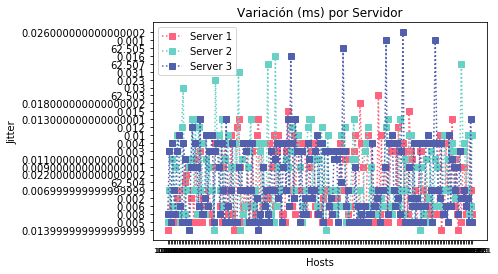

In [115]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(jitters_1, 's',
        color="#FF637D", linestyle=":", label="Server 1")
plt.plot(jitters_2, 's',
        color="#68D1C5", linestyle=":", label="Server 2")
plt.plot(jitters_3, 's',
        color="#525fad", linestyle=":", label="Server 3")
indice = np.arange(len(hosts_1)) 
plt.xticks(indice, hosts_1)
plt.title("Variación (ms) por Servidor")
plt.ylabel("Jitter")
plt.xlabel("Hosts")
plt.legend()
plt.show()


Como vemos, los resultados varían mucho de un test a otro, siendo muy inestable el valor del jitter. En cuanto al server 3, vemos que la calidad del canal en el momento de la comunicación no era muy buena.

**Análisis de Ancho de banda por Servidor**

La siguiente gráfica muestra la variación en cada test de cada servidor del ancho de banda empleado por cada uno.

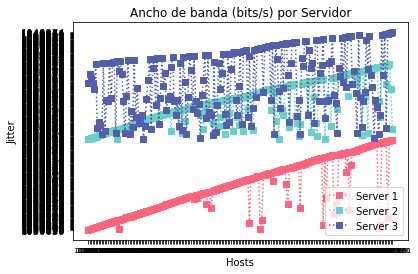

In [116]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(bandwidths_1, 's',
        color="#FF637D", linestyle=":", label="Server 1")
plt.plot(bandwidths_2, 's',
        color="#68D1C5", linestyle=":", label="Server 2")
plt.plot(bandwidths_3, 's',
        color="#525fad", linestyle=":", label="Server 3")
indice = np.arange(len(hosts_1)) 
plt.xticks(indice, hosts_1)
plt.title("Ancho de banda (bits/s) por Servidor")
plt.ylabel("Jitter")
plt.xlabel("Hosts")
plt.legend()
plt.show()


**Conclusiones**

El rango de valores que alcanza cada host es muy diferente, de nuevo, en este caso. Vemos todos los servidores tienen diferentes valores para los anchos de banda utilizados.